In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc,html
import folium.vector_layers
%matplotlib inline

In [3]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R


In [4]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [6]:
import datetime as dt
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Month']=pd.to_datetime(df['Date']).dt.month

In [7]:
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R,2005,1
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R,2005,1
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R,2005,1
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R,2005,1
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R,2005,1


In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [10]:
plt.figure(figsize=(12,6))
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
df_new.head(10)

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
2010     62.429968
2011    266.936175
2012    265.526196
2013     95.896092
2014    144.007348
Name: Estimated_fire_area, dtype: float64

<Figure size 1200x600 with 0 Axes>

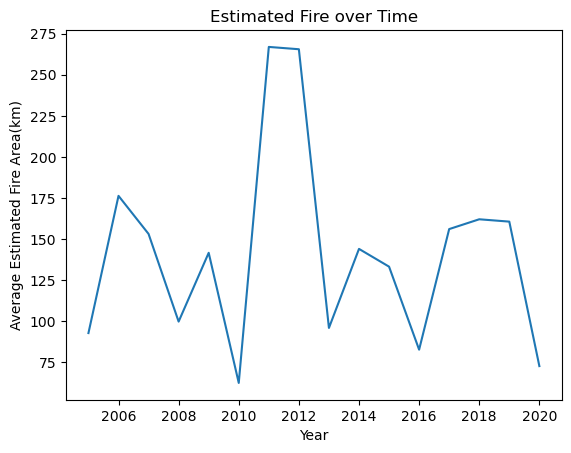

In [11]:
df_new.plot(x=df_new.index,y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area(km)')
plt.title('Estimated Fire over Time')
plt.show()

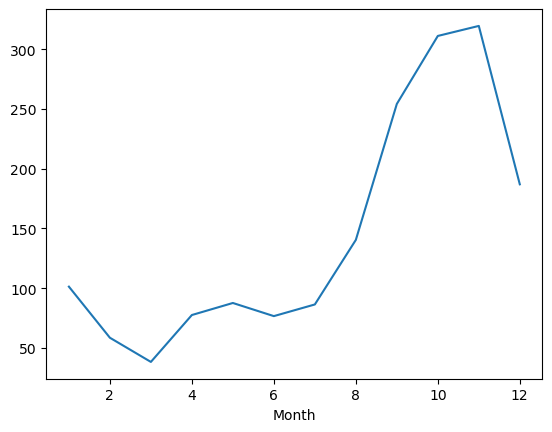

In [13]:
df_new1=df.groupby('Month')['Estimated_fire_area'].mean()
df_new1.plot(x=df_new1.index,y=df_new1.values)
plt.show()

In [14]:
df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

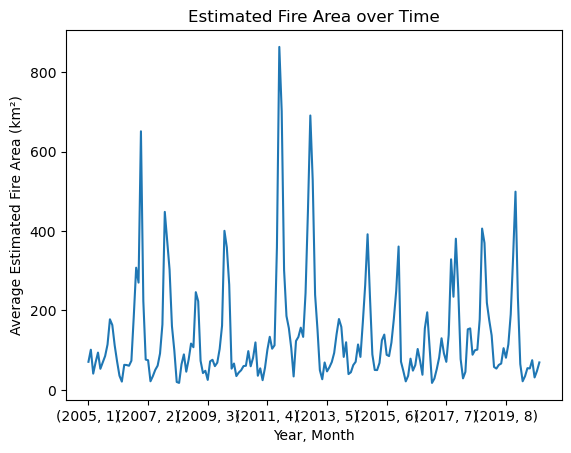

In [15]:
df_new.plot(x=df_new.index,y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [16]:
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R,2005,1
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R,2005,1
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R,2005,1
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R,2005,1
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R,2005,1


In [19]:
df['Region'].unique()


array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [20]:
df_new=df.groupby('Region')['Mean_estimated_fire_brightness'].mean()
df_new

Region
NSW    315.526218
NT     322.898453
QL     318.364434
SA     321.497609
TA     313.368483
VI     315.029792
WA     324.142246
Name: Mean_estimated_fire_brightness, dtype: float64

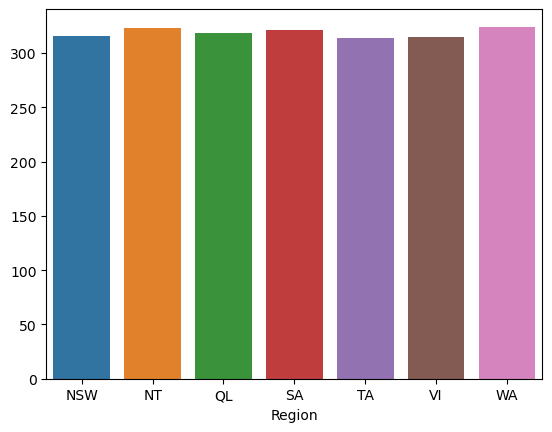

In [21]:
sns.barplot(x=df_new.index,y=df_new.values)
plt.show()

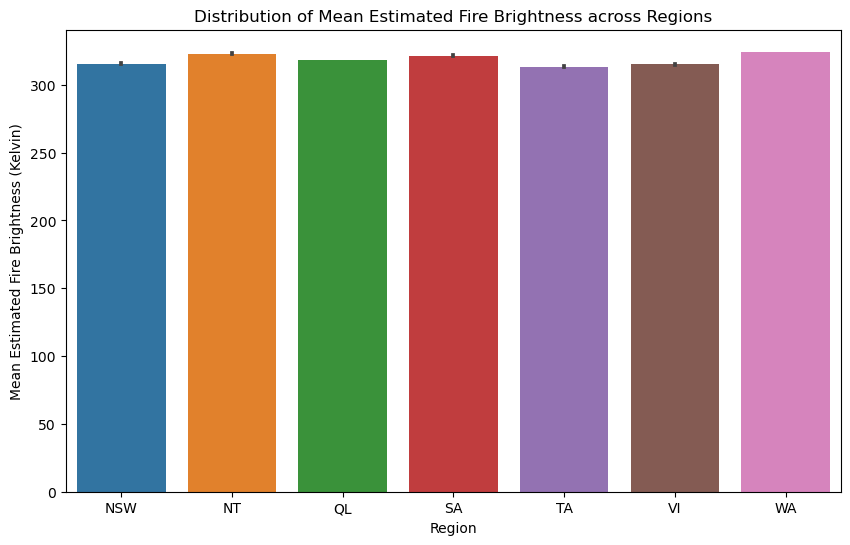

In [22]:
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [23]:
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [28]:
df_new=df.groupby('Region')['Count'].sum()
df_new

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

<Axes: ylabel='Count'>

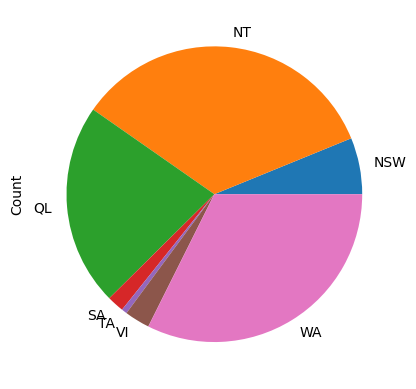

In [29]:
df_new.plot(kind='pie',x=df_new.index,y='df_new.values')

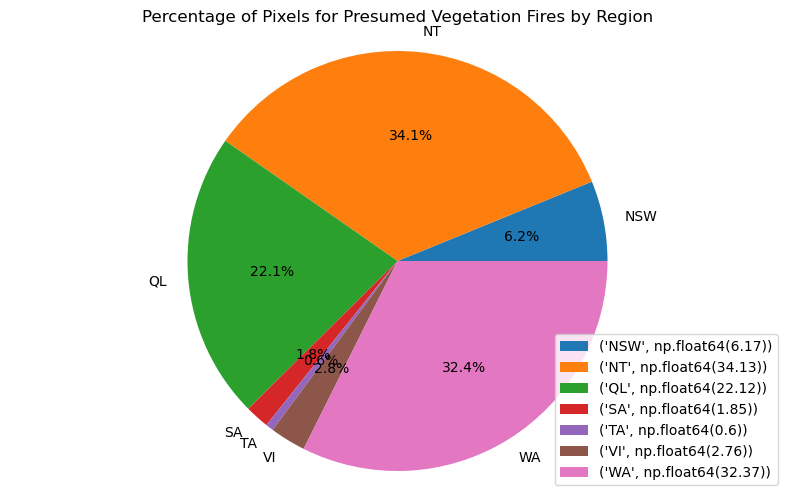

In [31]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

In [32]:
df.head(10)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1
5,NSW,1/9/2005,13.721429,314.757143,64.542857,83.142857,6.175990,38.142857,7,R,2005,1
6,NSW,1/10/2005,16.625455,324.800000,58.554545,91.454545,6.088738,37.072727,11,R,2005,1
7,NSW,1/11/2005,32.784375,318.446875,66.812500,91.000000,10.132456,102.666667,16,R,2005,1
8,NSW,1/12/2005,16.486154,323.238462,40.607692,87.769231,8.623165,74.358974,13,R,2005,1
9,NSW,1/13/2005,42.640000,325.376667,87.573333,86.666667,7.499206,56.238095,15,R,2005,1


In [34]:
df.shape

(26406, 12)

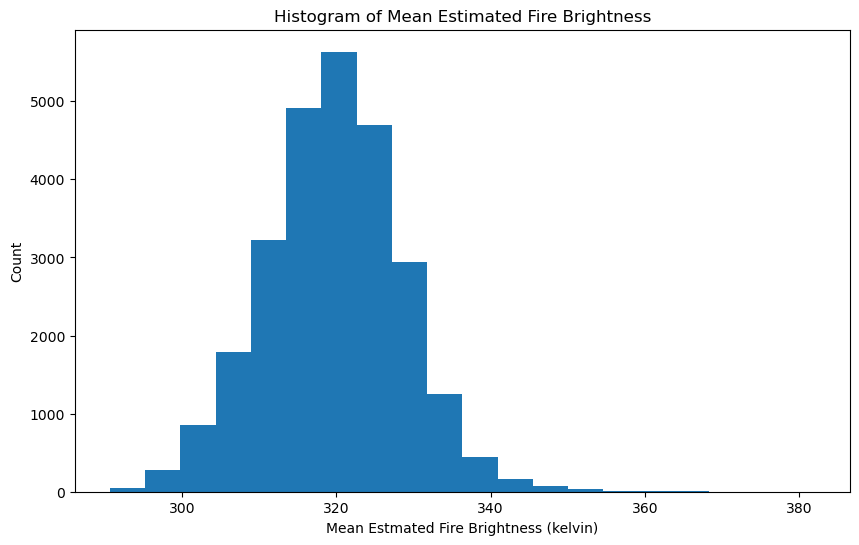

In [37]:
plt.figure(figsize=(10,6))
plt.hist(x=df['Mean_estimated_fire_brightness'],bins=20)
plt.xlabel('Mean Estmated Fire Brightness (kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group

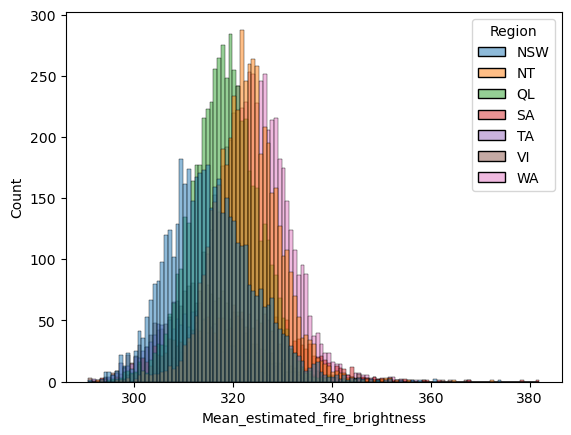

In [39]:
sns.histplot(data=df,x='Mean_estimated_fire_brightness',hue='Region')
plt.show()

/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/media/pandi-kabilesh-p/Disc-1/anaconda3/envs/muruga/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group

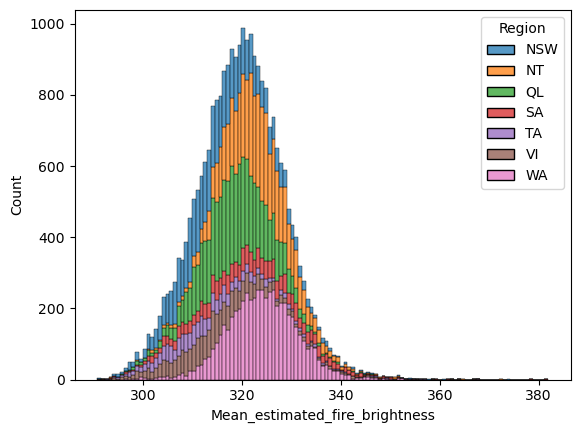

In [40]:
sns.histplot(data=df,x='Mean_estimated_fire_brightness',hue='Region',multiple='stack')
plt.show()

In [41]:
df.head(5)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [42]:
df[['Mean_estimated_fire_radiative_power','Mean_confidence']].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


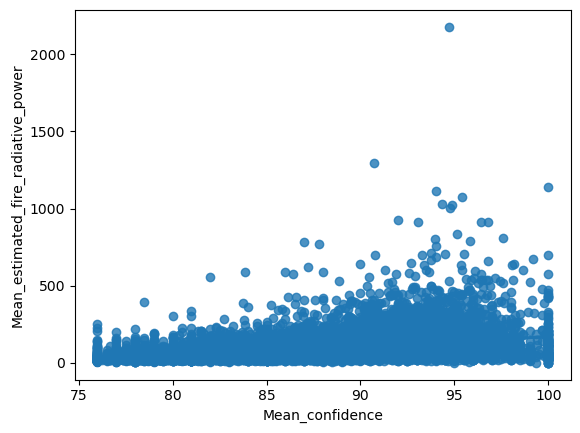

In [44]:
sns.regplot(data=df,x='Mean_confidence',y='Mean_estimated_fire_radiative_power')
plt.show()

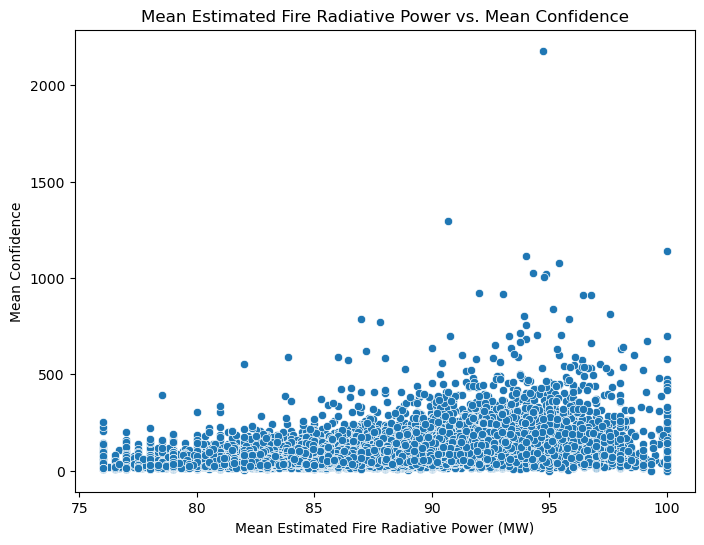

In [46]:
# Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(8, 6))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [47]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [51]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ),

        folium.Marker([lat,lng],popup=lab).add_to(aus_reg)
    )

# add incidents to map
Aus_map.add_child(aus_reg)

In [60]:
aus_reg=folium.map.FeatureGroup()
Aus_map=folium.Map(location=[-25,135],zoom_start=4)

for lat,lng,label in zip(reg.Lat,reg.Lon,reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat,lng],
            popup=label,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ),

        folium.Marker([lat,lng]).add_to(Aus_map)
    )
Aus_map.add_child(aus_reg)